In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
d=pd.read_csv('/content/drive/MyDrive/ heart.csv')

In [4]:
print(d)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [5]:
y=d.iloc[:,13:14]
x=d.iloc[:,0:13]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [6]:
print(x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
26    59    1   2       150   212    1        1      157      0      1.6   
87    46    1   1       101   197    1        1      156      0      0.0   
40    51    0   2       140   308    0        0      142      0      1.5   
128   52    0   2       136   196    0        0      169      0      0.1   
12    49    1   1       130   266    0        1      171      0      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
145   70    1   1       156   245    0        0      143      0      0.0   
251   43    1   0       132   247    1        0      143      1      0.1   
140   51    0   2       120   295    0        0      157      0      0.6   
301   57    1   0       130   131    0        1      115      1      1.2   
293   67    1   2       152   212    0        0      150      0      0.8   

     slope  ca  thal  
26       2   0     2  
87       2   0     3  
40       2   1    

In [7]:
from pandas.core.dtypes.cast import construct_1d_object_array_from_listlike
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
cls=DecisionTreeClassifier()
cc1=cls.fit(x_train,y_train)

In [8]:
yt=cc1.predict(x_test)
print(accuracy_score(yt,y_test))

0.7704918032786885


[Text(0.4744318181818182, 0.9444444444444444, 'X[2] <= 0.5\ngini = 0.498\nsamples = 242\nvalue = [114, 128]'),
 Text(0.2784090909090909, 0.8333333333333334, 'X[11] <= 0.5\ngini = 0.387\nsamples = 118\nvalue = [87, 31]'),
 Text(0.17045454545454544, 0.7222222222222222, 'X[12] <= 2.5\ngini = 0.5\nsamples = 55\nvalue = [28, 27]'),
 Text(0.09090909090909091, 0.6111111111111112, 'X[8] <= 0.5\ngini = 0.404\nsamples = 32\nvalue = [9, 23]'),
 Text(0.045454545454545456, 0.5, 'X[7] <= 96.5\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(0.022727272727272728, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06818181818181818, 0.3888888888888889, 'X[4] <= 316.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.045454545454545456, 0.2777777777777778, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.09090909090909091, 0.2777777777777778, 'X[10] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06818181818181818, 0.16666666666666666, 'gini = 0.0\nsamples =

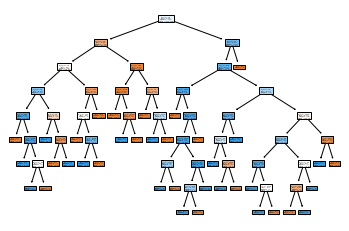

In [9]:
from sklearn import tree
tree.plot_tree(cc1,filled=True)

support vector machine

In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score
cc=svm.SVC(kernel='linear')

In [11]:
c1=cc.fit(x_train,y_train.values.ravel())

In [12]:
yp=c1.predict(x_test)

In [13]:
print(accuracy_score(y_test,yp))

0.8360655737704918


KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kk=KNeighborsClassifier()
cc=kk.fit(x_train,y_train.values.ravel())

In [15]:
yp=cc.predict(x_test)
print(yp)
print(y_test)

[0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0]
     target
97        1
122       1
84        1
231       0
110       1
..      ...
273       0
165       0
51        1
285       0
234       0

[61 rows x 1 columns]


In [16]:
print(accuracy_score(yp,y_test))

0.6065573770491803


Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
cls=RandomForestClassifier()
cc=cls.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [18]:
yt=cc.predict(x_test)
print(accuracy_score(yt,y_test))

0.8032786885245902


logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8688524590163934
